# **`M2_AI1_PRECIO GASOLINA`**

NOMBRE: Elzabeth Peredo

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import datetime
import locale
import math
from math import log, log10
from IPython.display import display, HTML
from tabulate import tabulate

In [22]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

url='https://drive.google.com/file/d/1pXjkOdBJDFGiJJlihcs0pjcZPKScP7jx/view?usp=share_link'
file_id = url.split('/')[-2]

fileDownloaded = drive.CreateFile({'id':file_id})

fileDownloaded.GetContentFile('precio_gasolina.csv')

df = pd.read_csv('precio_gasolina.csv', delimiter=';')
df.head()

,Provincia,Localidad,Codigo_postal,Direccion,Margen,Toma_de_datos,Precio,Rotulo,Tipo_venta,Rem,Horario,Tipo_servicio,Fecha_extraccion
0,SANTA CRUZ DE TENERIFE,CUESTA LA,38320,AVENIDA LOS MENCEYES 223,D,01 08 2020 1353,"0,758",PCAN,P,dm,LD 24H,LD 24H A,01 08 2020
1,SANTA CRUZ DE TENERIFE,LA LAGUNA,38200,CARRETERA TF111 KM 8 346,D,01 08 2020 0900,"0,759",OCEANO,P,dm,LS 06002200 D 07002200,LS 06002200 A D 07002200 A,01 08 2020
2,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38110,CALLE LAURA GROTE DE LA PUERTA 2,D,27 07 2020 1202,"0,769",GMOIL,P,dm,LV 24H S 06002000 D 08001500,LV 24H A S 06002000 A D 08001500 A,01 08 2020
3,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38010,POLIGONO EL MAYORAZGO SN,N,29 07 2020 0000,"0,789",TGASTU TREBOL,P,dm,LS 07302100 D 08001400,LS 07302100 A D 08001400 A,01 08 2020
4,SANTA CRUZ DE TENERIFE,ADEJE,38670,CALLE CHARFA ESQUINA AVENIDA LAS PALMITAS SN,D,27 07 2020 1159,"0,789",GMOIL,P,dm,LS 07002200 D 09001600,LS 07002200 A D 09001600 A,01 08 2020


In [113]:
# Colores de gráficos
colors = ['#0069c0','#137fd9',"#2196f3","#20f26f",'#3df883']

# **Identifica el tipo de variables**

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Provincia         9991 non-null   object
 1   Localidad         9991 non-null   object
 2   Codigo_postal     9991 non-null   int64 
 3   Direccion         9991 non-null   object
 4   Margen            9991 non-null   object
 5   Toma_de_datos     9991 non-null   object
 6   Precio            9991 non-null   object
 7   Rotulo            9990 non-null   object
 8   Tipo_venta        9991 non-null   object
 9   Rem               9991 non-null   object
 10  Horario           9991 non-null   object
 11  Tipo_servicio     9845 non-null   object
 12  Fecha_extraccion  9991 non-null   object
dtypes: int64(1), object(12)
memory usage: 1014.8+ KB


El método **info()** imprime información sobre un DataFrame, incluido el tipo de índice y las columnas, los valores no nulos y el uso de la memoria.



Al usar los datos de una base de datos en csv, ciertas variables se convierten en object, en el siguiente apartado se convertira algunas variables object a su respectiva clasificación.

# **Identifica la clasificación a la que corresponden las variables.**


In [ ]:
df_new=df.copy()

La variable "**Precio**" deberia ser una variable float, debido a que en el archivo csv el decimal esta con ",", no reconoce la variable como numérica. En primera instancia se debe reemplzar "," por ".", despues usando la propiedad "**astype**" lo convertimos a "**float**".

In [ ]:
df_new['Precio']= df_new["Precio"].str.replace(',', '.', case = False)
df_new['Precio'] = df_new['Precio'].astype(float)

Las variables "**Toma_de_datos**" y "**Fecha_extraccion**" usando la propiedad de pandas "**to_datetime**", nos permite convertir la variable a tipo datetime.

In [40]:
df_new['Toma_de_datos'] = pd.to_datetime(df_new['Toma_de_datos'])
df_new['Fecha_extraccion'] = pd.to_datetime(df_new['Fecha_extraccion'])

In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Provincia         9991 non-null   object        
 1   Localidad         9991 non-null   object        
 2   Codigo_postal     9991 non-null   int64         
 3   Direccion         9991 non-null   object        
 4   Margen            9991 non-null   object        
 5   Toma_de_datos     9991 non-null   datetime64[ns]
 6   Precio            9991 non-null   float64       
 7   Rotulo            9990 non-null   object        
 8   Tipo_venta        9991 non-null   object        
 9   Rem               9991 non-null   object        
 10  Horario           9991 non-null   object        
 11  Tipo_servicio     9845 non-null   object        
 12  Fecha_extraccion  9991 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 1014.8+ KB

# **Identifica el tipo de variables que sería desde el punto de vista del análisis de datos.**

En la siguiente tabla se evidencia el tipo de dato, tipo de variable estadistica y los atributos de esta variable.

In [123]:
df_var = pd.DataFrame()

# creamos las columnas
df_var['Tipo'] = None
df_var['Variable Estadistica'] = None
df_var['Key'] = None

# añadimos filas por su nombre de fila
df_var.loc['Provincia']=['Varchar','Cualitativa nominal','']
df_var.loc['Localidad']=['Varchar','Cualitativa nominal','']
df_var.loc['Codigo_postal']=['Integer','Cuantitativa discreta','']
df_var.loc['Direccion']=['Varchar','Cualitativa nominal','']
df_var.loc['Margen']=['Varchar','Cualitativa nominal',"""
D: Derecho.
I: Izquierdo.
N: No aplica
"""]
df_var.loc['Toma_de_datos']=['Date','Cualitativa nominal','']
df_var.loc['Precio']=['Decimal','Cuantitativa continua','']
df_var.loc['Rotulo']=['Varchar','Cualitativa nominal','']
df_var.loc['Tipo_venta']=['Varchar','Cualitativa ordinal',"""
P: Venta al público en general.
R: Venta reVarcharida a socios o cooperativistas
"""]
df_var.loc['Rem']=['Varchar','Cualitativa ordinal',"""
OM: Datos procedentes del operador mayorista.
DM: Datos procedentes del distribuidor minorista
"""]
df_var.loc['Horario']=['Date','Cuantitativa','']
df_var.loc['Tipo_servicio']=['Varchar','Cualitativa ordinal',"""
P: Servicio asistido por personal.
A: Autoservicio por parte del cliente, con presencia de personal en la instalación.
D: Autoservicio por parte del cliente, sin presencia de personal en la instalación.
N: No aplica, no se tiene información.
"""]
df_var.loc['Fecha_extraccion']=['Date','Cuantitativa','']

In [124]:
print(tabulate(df_var, headers = 'keys', tablefmt = 'psql'))

+------------------+---------+------------------------+-------------------------------------------------------------------------------------+
|                  | Tipo    | Variable Estadistica   | Key                                                                                 |
|------------------+---------+------------------------+-------------------------------------------------------------------------------------|
| Provincia        | Varchar | Cualitativa nominal    |                                                                                     |
| Localidad        | Varchar | Cualitativa nominal    |                                                                                     |
| Codigo_postal    | Integer | Cuantitativa discreta  |                                                                                     |
| Direccion        | Varchar | Cualitativa nominal    |                                                                                     |
| Marg

# **Crear una tabla de frecuencias y el gráfico correspondiente para las variables siguientes: provincia, margen y precio**

## 1. Provincia

In [25]:
#FRECUENCIA ABSOLUTA
df_provincia=df_new.groupby('Provincia').agg(ni=("Provincia", "count")).sort_values(['ni'],ascending=True)
#FRECUENCIA RELATIVA
df_provincia['fi%'] = round((df_provincia.ni / df_provincia.ni.sum())* 100,1)

#FRECUENCIA ABSOLUTA ACUMULADA
df_provincia['Ni'] = round(df_provincia.ni.cumsum(),1)
#FRECUENCIA RELATIVA ACUMULADA
df_provincia['Fi%'] = round((df_provincia.ni.cumsum() / df_provincia.ni.sum())* 100,1)

df_provincia.head()

,ni,fi%,Ni,Fi%
Provincia,,,,
CEUTA,9,0.1,9,0.1
MELILLA,13,0.1,22,0.2
SORIA,36,0.4,58,0.6
ARABA ALAVA,61,0.6,119,1.2
TERUEL,62,0.6,181,1.8


Text(0.5, 1.0, 'Frecuencia por Provincia')

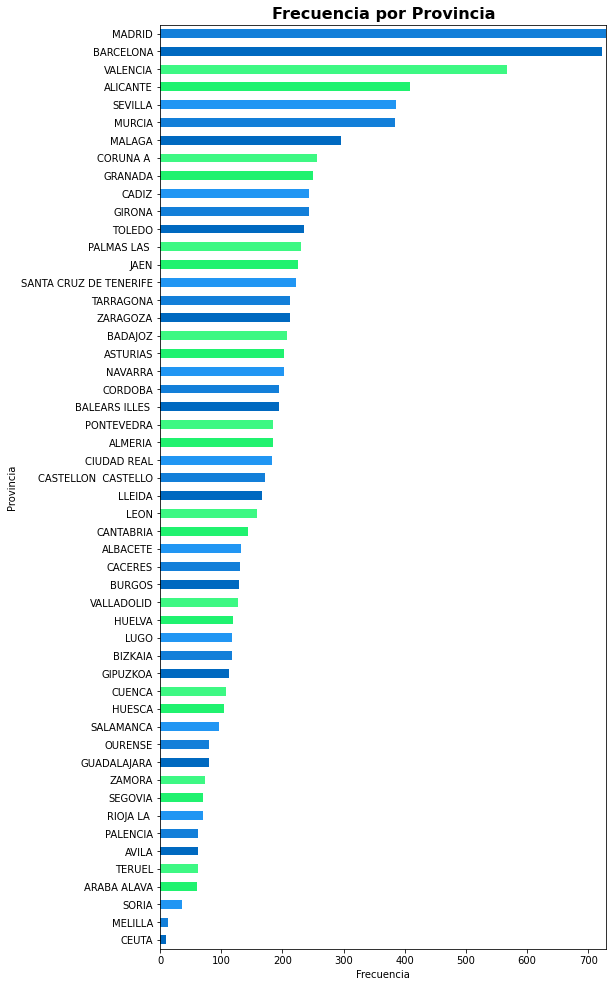

In [114]:
n_max=df_provincia['ni'].max()
pkt_bar = df_provincia['ni'].plot(kind="barh", y="Total_Power", figsize=(8, 17),
                   legend=False, color=colors)
pkt_bar.set_xlim((0, n_max))
pkt_bar.set_xlabel("Frecuencia")
pkt_bar.set_title("Frecuencia por Provincia",
                  fontsize=16, weight="bold")

En el gráfico precedente se observa que la provincia de Madrid es la que mayor cantidad de datos recopilados tiene al igual que Barcelona. Esto se debe a la dimensión poblacional de cada uno.

## 2. Margen

In [99]:
df_new['Margen1'] = np.where(df_new['Margen']=='D', 'D: Derecho',
                             np.where(df_new['Margen']=='I', 'I: Izquierdo',
                                      np.where(df_new['Margen']=='N', 'N: No aplica','')))

In [100]:
#FRECUENCIA ABSOLUTA
df_margen=df_new.groupby('Margen1').agg(ni=("Margen1", "count"))
#FRECUENCIA RELATIVA
df_margen['fi%'] = round((df_margen.ni / df_margen.ni.sum())* 100,1)

#FRECUENCIA ABSOLUTA ACUMULADA
df_margen['Ni'] = round(df_margen.ni.cumsum(),1)
#FRECUENCIA RELATIVA ACUMULADA
df_margen['Fi%'] = round((df_margen.ni.cumsum() / df_margen.ni.sum())* 100,1)

df_margen.head()

,ni,fi%,Ni,Fi%
Margen1,,,,
D: Derecho,5016,50.2,5016,50.2
I: Izquierdo,2596,26.0,7612,76.2
N: No aplica,2379,23.8,9991,100.0


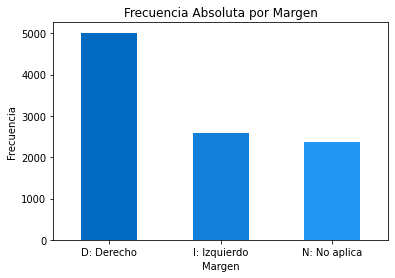

In [115]:
df_margen['ni'].plot.bar(x='Margen1',y='ni',title='Frecuencia Absoluta por Margen',color=colors)
plt.xticks(rotation=360)
plt.xlabel('Margen')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-122-12f0d3dd41b5>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


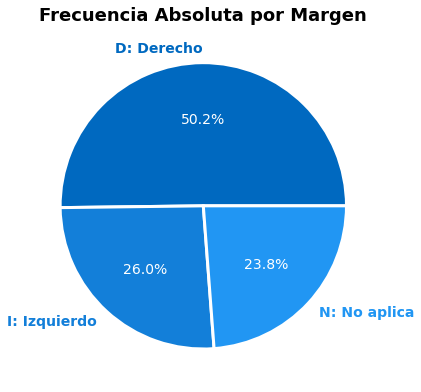

In [122]:
fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(df_margen[['fi%']], 
         labels=df_margen.index, 
         autopct='%.1f%%',
         colors = colors,
         textprops={'fontsize': 14},
         wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('''Frecuencia Absoluta por Margen''', fontsize=18,fontweight="bold")

plt.tight_layout()

El gráfico precedente evidencia que el mayor margen se encuentra en el lado derecho con una representación del 50.2%, en segundo lugar se encuentra el lado izquierdo con un 26%, siendo el valor más significativo el lado derecho por tener un valor mayor del 50%.

## 3. Precio

Para poder determiar la cantidad de intervalos se uso la** Regla de Sturges** con la fórmula `1 + 3.22 ⋅ log10N` debido a que N es grande.

In [27]:
rango=df_new['Precio'].max()-df_new['Precio'].min()
intervalos=round(1+3.32*log10(df_new['Precio'].count()))
amplitud=rango/intervalos

df_new['Precio_range'] = pd.cut(df_new['Precio'], bins=intervalos, precision=0, include_lowest=True)
df_new.head()

,Provincia,Localidad,Codigo_postal,Direccion,Margen,Toma_de_datos,Precio,Rotulo,Tipo_venta,Rem,Horario,Tipo_servicio,Fecha_extraccion,Precio_range
0,SANTA CRUZ DE TENERIFE,CUESTA LA,38320,AVENIDA LOS MENCEYES 223,D,2020-01-08 13:53:00,0.758,PCAN,P,dm,LD 24H,LD 24H A,2020-01-08,"(0.75, 0.81]"
1,SANTA CRUZ DE TENERIFE,LA LAGUNA,38200,CARRETERA TF111 KM 8 346,D,2020-01-08 09:00:00,0.759,OCEANO,P,dm,LS 06002200 D 07002200,LS 06002200 A D 07002200 A,2020-01-08,"(0.75, 0.81]"
2,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38110,CALLE LAURA GROTE DE LA PUERTA 2,D,2020-07-27 12:02:00,0.769,GMOIL,P,dm,LV 24H S 06002000 D 08001500,LV 24H A S 06002000 A D 08001500 A,2020-01-08,"(0.75, 0.81]"
3,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38010,POLIGONO EL MAYORAZGO SN,N,2020-07-29 00:00:00,0.789,TGASTU TREBOL,P,dm,LS 07302100 D 08001400,LS 07302100 A D 08001400 A,2020-01-08,"(0.75, 0.81]"
4,SANTA CRUZ DE TENERIFE,ADEJE,38670,CALLE CHARFA ESQUINA AVENIDA LAS PALMITAS SN,D,2020-07-27 11:59:00,0.789,GMOIL,P,dm,LS 07002200 D 09001600,LS 07002200 A D 09001600 A,2020-01-08,"(0.75, 0.81]"


Para este caso en concreto se tiene 14 intervalos, este dato es necesario para determinar los rangos de precio y la frecuencia en cada uno de estos.

In [33]:
#FRECUENCIA ABSOLUTA
#df_precio_range=df.groupby('Precio_range').agg(ni=("Precio_range", "count"))
data_precio=df_new['Precio_range'].copy(deep='True')
df_precio_range=pd.DataFrame(data_precio)
df_precio_range['ni']=df_new.groupby('Precio_range')['Precio_range'].transform('count')
df_precio_range=df_precio_range.drop_duplicates()

#FRECUENCIA RELATIVA
df_precio_range['fi%'] = round(df_precio_range.ni / df_precio_range.ni.sum()* 100,2)
 
#FRECUENCIA ABSOLUTA ACUMULADA
df_precio_range['Ni'] = round(df_precio_range.ni.cumsum(),2)
#FRECUENCIA RELATIVA ACUMULADA
df_precio_range['Fi%'] = round(df_precio_range.ni.cumsum() / df_precio_range.ni.sum()* 100,2)

df_precio_range.head(intervalos)

,Precio_range,ni,fi%,Ni,Fi%
0,"(0.75, 0.81]",6,0.06,6,0.06
6,"(0.81, 0.86]",29,0.29,35,0.35
35,"(0.86, 0.91]",112,1.12,147,1.47
147,"(0.91, 0.96]",86,0.86,233,2.33
233,"(0.96, 1.0]",240,2.40,473,4.73
473,"(1.0, 1.05]",456,4.56,929,9.30
929,"(1.05, 1.1]",1124,11.25,2053,20.55
2053,"(1.1, 1.15]",1427,14.28,3480,34.83
3480,"(1.15, 1.2]",3721,37.24,7201,72.07
7201,"(1.2, 1.25]",2543,25.45,9744,97.53


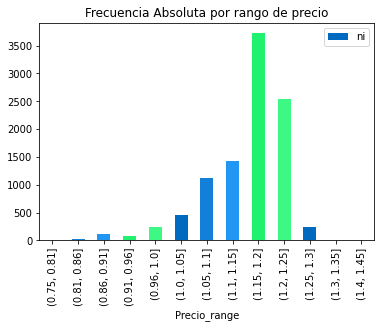

In [118]:
df_precio_range.plot.bar(x='Precio_range',y='ni',title='Frecuencia Absoluta por rango de precio', color=colors)
plt.show()

El gráfico precedente evidencia que la mayor concentración se enceuntra en el rango de precio de 1.15 a 1.2 representando un 37.24% de la muestra total.

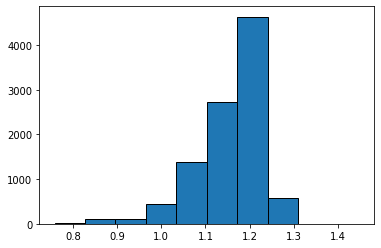

In [121]:
n, bins, parches = plt.hist(df_new['Precio'], edgecolor = 'black')
plt.show ()